# IT5006 Milestone 1 - Exploratory Data Analysis (EDA)

This notebook is structured to align with the IT5006 project brief for Milestone 1.

It covers:
- Data preparation and cleaning methodology
- Temporal pattern analysis
- Spatial distribution study
- Crime correlation analysis
- Key findings used to support dashboard design and model preparation

Scope and split strategy used in this notebook:
- Analysis window: 2015 to 2025
- Modeling split: 2015-2024 for training, 2025 for test/validation


In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading and Scope
We load the raw Chicago crime dataset and restrict the analysis window to 2015-2025 to match the project scope (recent decade for model development and 2025 for testing/validation).


In [203]:
# Load raw data and constrain to the project analysis window (2015-2025).
df = pd.read_csv('Crimes_-_2001_to_Present_20260202.csv')
df = df[(df['Year'] >= 2015) & (df['Year'] <= 2025)].copy()


## Initial Inspection
We inspect the schema, sample rows, and summary statistics to understand data types, ranges, and potential quality issues before cleaning.


In [204]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755508 entries, 12281 to 2767788
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), obje

In [205]:
df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
12281,14075483,JK105557,12/31/2025 11:58:00 PM,050XX S PAULINA ST,0560,ASSAULT,SIMPLE,RESIDENCE,False,False,...,20.0,61.0,08A,1165860.0,1871343.0,2025,01/09/2026 03:40:47 PM,41.802549,-87.667246,"(41.802549018, -87.667246428)"
12282,14070833,JK100050,12/31/2025 11:55:00 PM,053XX W WASHINGTON BLVD,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,APARTMENT,False,True,...,37.0,25.0,07,1140809.0,1900235.0,2025,01/08/2026 03:46:48 PM,41.882329,-87.758411,"(41.882328854, -87.758411303)"
12283,14070845,JK100006,12/31/2025 11:54:00 PM,013XX W LAKE ST,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",RESTAURANT,True,False,...,27.0,28.0,08B,1167120.0,1901555.0,2025,01/08/2026 03:46:48 PM,41.885427,-87.661759,"(41.885426714, -87.661759042)"
12284,14070745,JK100011,12/31/2025 11:54:00 PM,100XX W OHARE ST,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,...,41.0,76.0,24,1100658.0,1934241.0,2025,01/08/2026 03:46:48 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)"
12285,14070799,JK100014,12/31/2025 11:54:00 PM,100XX W OHARE ST,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,...,41.0,76.0,24,1100658.0,1934241.0,2025,01/08/2026 03:46:48 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)"


In [206]:
df.describe()


,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.755508e+06,2.755508e+06,2.755507e+06,2.755452e+06,2.755329e+06,2.713255e+06,2.713255e+06,2.755508e+06,2.713255e+06,2.713255e+06
mean,1.199882e+07,1.147835e+03,1.124928e+01,2.316696e+01,3.669468e+01,1.165042e+06,1.886548e+06,2.019885e+03,4.184427e+01,-8.766986e+01
std,1.323831e+06,7.004106e+02,6.998368e+00,1.396870e+01,2.150027e+01,1.634312e+04,3.155335e+04,3.201904e+00,8.677656e-02,5.947462e-02
min,2.171400e+04,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03,3.661945e+01,-9.168657e+01
25%,1.103952e+07,6.110000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153425e+06,1.859275e+06,2.017000e+03,4.176913e+01,-8.771201e+01
50%,1.200848e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166873e+06,1.893218e+06,2.020000e+03,4.186282e+01,-8.766337e+01
75%,1.305087e+07,1.723000e+03,1.700000e+01,3.400000e+01,5.400000e+01,1.176607e+06,1.909355e+06,2.023000e+03,4.190694e+01,-8.762755e+01
max,1.409747e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.025000e+03,4.202267e+01,-8.752453e+01


## Data Cleaning and Preprocessing
Key cleaning steps include datetime parsing, removing unused columns, handling missing values, and ensuring geographic fields are valid for spatial analysis.


In [207]:
# Standardize timestamp columns for reliable time-based feature extraction.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


In [209]:
# Checking conversion results
print("Date conversion check:")
print(df[['Date', 'Updated On']].head())


Date conversion check:
             Date          Updated On
12281  2025-12-31 2026-01-09 15:40:47
12282  2025-12-31 2026-01-08 15:46:48
12283  2025-12-31 2026-01-08 15:46:48
12284  2025-12-31 2026-01-08 15:46:48
12285  2025-12-31 2026-01-08 15:46:48


In [208]:
df['Time'] = df['Date'].dt.time   
df['Date'] = df['Date'].dt.date   


In [149]:
df['Updated_Date'] = df['Updated On'].dt.date
df['Updated_Time'] = df['Updated On'].dt.time


In [150]:
col_index = df.columns.get_loc('Updated On')
df.drop(columns=['Updated On'], inplace=True)


In [151]:
cols = df.columns.tolist()
cols.insert(col_index, 'Updated_Time')
cols.insert(col_index, 'Updated_Date')

df = df[cols]


In [152]:
df.head(10)


,ID,Case Number,Date,Time,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated_Date,Updated_Time,Latitude,Longitude,Location,Updated_Date,Updated_Time
12281,14075483,JK105557,2025-12-31,23:58:00,050XX S PAULINA ST,0560,ASSAULT,SIMPLE,RESIDENCE,False,...,1165860.0,1871343.0,2025,2026-01-09,15:40:47,41.802549,-87.667246,"(41.802549018, -87.667246428)",2026-01-09,15:40:47
12282,14070833,JK100050,2025-12-31,23:55:00,053XX W WASHINGTON BLVD,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,APARTMENT,False,...,1140809.0,1900235.0,2025,2026-01-08,15:46:48,41.882329,-87.758411,"(41.882328854, -87.758411303)",2026-01-08,15:46:48
12283,14070845,JK100006,2025-12-31,23:54:00,013XX W LAKE ST,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",RESTAURANT,True,...,1167120.0,1901555.0,2025,2026-01-08,15:46:48,41.885427,-87.661759,"(41.885426714, -87.661759042)",2026-01-08,15:46:48
12284,14070745,JK100011,2025-12-31,23:54:00,100XX W OHARE ST,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,...,1100658.0,1934241.0,2025,2026-01-08,15:46:48,41.976290,-87.905227,"(41.976290414, -87.905227221)",2026-01-08,15:46:48
12285,14070799,JK100014,2025-12-31,23:54:00,100XX W OHARE ST,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,...,1100658.0,1934241.0,2025,2026-01-08,15:46:48,41.976290,-87.905227,"(41.976290414, -87.905227221)",2026-01-08,15:46:48
12286,14071367,JK100694,2025-12-31,23:50:00,005XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,HOTEL / MOTEL,False,...,1177364.0,1897937.0,2025,2026-01-08,15:46:48,41.875273,-87.624251,"(41.875272573, -87.624251314)",2026-01-08,15:46:48
12287,14070841,JK100162,2025-12-31,23:50:00,068XX S PERRY AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,1176577.0,1859676.0,2025,2026-01-08,15:46:48,41.770299,-87.628294,"(41.77029895, -87.628293582)",2026-01-08,15:46:48
12288,14070783,JK100009,2025-12-31,23:49:00,0000X E WACKER DR,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,...,1177013.0,1902660.0,2025,2026-01-08,15:46:48,41.888241,-87.625397,"(41.888240695, -87.625396986)",2026-01-08,15:46:48
12289,14070846,JK100015,2025-12-31,23:47:00,004XX W SURF ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,...,1172790.0,1919420.0,2025,2026-01-08,15:46:48,41.934326,-87.640408,"(41.934325528, -87.640407923)",2026-01-08,15:46:48
12290,14071594,JK100608,2025-12-31,23:45:00,006XX E GRAND AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,...,1180796.0,1904058.0,2025,2026-01-08,15:46:48,41.891990,-87.611462,"(41.891990384, -87.611461502)",2026-01-08,15:46:48


In [153]:
df.dtypes


ID                        int64
Case Number              object
Date                     object
Time                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated_Date             object
Updated_Time             object
Latitude                float64
Longitude               float64
Location                 object
Updated_Date             object
Updated_Time             object
dtype: object

In [154]:
df.shape


(2755508, 26)

In [155]:
max_year = df['Date'].max()
min_year = df['Date'].min()
print(f"Latest Year: {max_year}")
print(f"Earliest Year: {min_year}")


Latest Year: 2025-12-31
Earliest Year: 2015-01-01


In [159]:
df.shape


(2755508, 26)

## Data Quality Audit and Cleaning Pipeline

This section applies a transparent cleaning pipeline:
- quantify missing values
- remove non-essential columns
- handle missing categorical/numeric fields with explicit rules
- remove records that cannot support spatial analysis (missing latitude/longitude)

These steps are documented to satisfy reproducibility and report requirements.


In [160]:
x = df.isnull().sum()
x = x[x > 0]
print("Missing Values in Dataset:\n", x)


Missing Values in Dataset:
 Location Description    13632
District                    1
Ward                       56
Community Area            179
X Coordinate            42253
Y Coordinate            42253
Latitude                42253
Longitude               42253
Location                42253
dtype: int64


In [161]:
# Drop identifiers and high-cardinality fields that are not needed for this EDA scope.
drop_col = ['ID', 'Case Number', 'IUCR', 'Updated_Date', 'Updated_Time', 
             'X Coordinate', 'Y Coordinate', 'Location']
df.drop(columns=drop_col, inplace=True)


In [162]:
df.head(10)


,Date,Time,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
12281,2025-12-31,23:58:00,050XX S PAULINA ST,ASSAULT,SIMPLE,RESIDENCE,False,False,931,9.0,20.0,61.0,08A,2025,41.802549,-87.667246
12282,2025-12-31,23:55:00,053XX W WASHINGTON BLVD,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,APARTMENT,False,True,1522,15.0,37.0,25.0,07,2025,41.882329,-87.758411
12283,2025-12-31,23:54:00,013XX W LAKE ST,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",RESTAURANT,True,False,1215,12.0,27.0,28.0,08B,2025,41.885427,-87.661759
12284,2025-12-31,23:54:00,100XX W OHARE ST,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,1651,16.0,41.0,76.0,24,2025,41.976290,-87.905227
12285,2025-12-31,23:54:00,100XX W OHARE ST,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,1651,16.0,41.0,76.0,24,2025,41.976290,-87.905227
12286,2025-12-31,23:50:00,005XX S MICHIGAN AVE,BATTERY,SIMPLE,HOTEL / MOTEL,False,False,123,1.0,4.0,32.0,08B,2025,41.875273,-87.624251
12287,2025-12-31,23:50:00,068XX S PERRY AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,722,7.0,6.0,69.0,08B,2025,41.770299,-87.628294
12288,2025-12-31,23:49:00,0000X E WACKER DR,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,111,1.0,42.0,32.0,15,2025,41.888241,-87.625397
12289,2025-12-31,23:47:00,004XX W SURF ST,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1934,19.0,44.0,6.0,08B,2025,41.934326,-87.640408
12290,2025-12-31,23:45:00,006XX E GRAND AVE,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,1834,18.0,42.0,8.0,11,2025,41.891990,-87.611462


In [163]:
x = df.isnull().sum()
x = x[x > 0]
print("Missing Values in Dataset:\n", x)


Missing Values in Dataset:
 Location Description    13632
District                    1
Ward                       56
Community Area            179
Latitude                42253
Longitude               42253
dtype: int64


In [164]:
df['Location Description'].fillna('UNKNOWN', inplace=True)


In [165]:
df = df.dropna(subset=['District'])


In [166]:
df.drop(columns=['Ward'], inplace=True)


In [167]:
df['Community Area'].fillna(-1, inplace=True)


In [168]:
df = df.dropna(subset=['Latitude', 'Longitude'])


In [169]:
print("Missing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 Date                    0
Time                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
dtype: int64


In [170]:
df.shape


(2713254, 15)

In [171]:
df.head(10)


,Date,Time,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,FBI Code,Year,Latitude,Longitude
12281,2025-12-31,23:58:00,050XX S PAULINA ST,ASSAULT,SIMPLE,RESIDENCE,False,False,931,9.0,61.0,08A,2025,41.802549,-87.667246
12282,2025-12-31,23:55:00,053XX W WASHINGTON BLVD,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,APARTMENT,False,True,1522,15.0,25.0,07,2025,41.882329,-87.758411
12283,2025-12-31,23:54:00,013XX W LAKE ST,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",RESTAURANT,True,False,1215,12.0,28.0,08B,2025,41.885427,-87.661759
12284,2025-12-31,23:54:00,100XX W OHARE ST,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,1651,16.0,76.0,24,2025,41.976290,-87.905227
12285,2025-12-31,23:54:00,100XX W OHARE ST,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,1651,16.0,76.0,24,2025,41.976290,-87.905227
12286,2025-12-31,23:50:00,005XX S MICHIGAN AVE,BATTERY,SIMPLE,HOTEL / MOTEL,False,False,123,1.0,32.0,08B,2025,41.875273,-87.624251
12287,2025-12-31,23:50:00,068XX S PERRY AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,722,7.0,69.0,08B,2025,41.770299,-87.628294
12288,2025-12-31,23:49:00,0000X E WACKER DR,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,111,1.0,32.0,15,2025,41.888241,-87.625397
12289,2025-12-31,23:47:00,004XX W SURF ST,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1934,19.0,6.0,08B,2025,41.934326,-87.640408
12290,2025-12-31,23:45:00,006XX E GRAND AVE,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,1834,18.0,8.0,11,2025,41.891990,-87.611462


In [172]:
df.dtypes


Date                     object
Time                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Community Area          float64
FBI Code                 object
Year                      int64
Latitude                float64
Longitude               float64
dtype: object

## Data Type Optimization
Convert categorical fields to `category` and downcast integer-like fields to reduce memory footprint for large-scale analysis.


In [173]:
# Optimize dtypes to reduce memory usage and improve plotting/groupby performance.
cat_cols = ['Primary Type', 'Description', 'Location Description', 'FBI Code']
for col in cat_cols:
    df[col] = df[col].astype('category')

int_cols = ['District', 'Community Area']
for col in int_cols:
    df[col] = pd.to_numeric(df[col], downcast='integer', errors='coerce')

print(df.dtypes)


Date                      object
Time                      object
Block                     object
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                    int8
Community Area              int8
FBI Code                category
Year                       int64
Latitude                 float64
Longitude                float64
dtype: object


## Feature Engineering
Create time-based features (Month, DayOfWeek, Hour) from the incident timestamp to support temporal pattern analysis.


In [174]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour


In [175]:
df.head(10)


,Date,Time,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,FBI Code,Year,Latitude,Longitude,Month,DayOfWeek,Hour
12281,2025-12-31,23:58:00,050XX S PAULINA ST,ASSAULT,SIMPLE,RESIDENCE,False,False,931,9,61,08A,2025,41.802549,-87.667246,12,Wednesday,23
12282,2025-12-31,23:55:00,053XX W WASHINGTON BLVD,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,APARTMENT,False,True,1522,15,25,07,2025,41.882329,-87.758411,12,Wednesday,23
12283,2025-12-31,23:54:00,013XX W LAKE ST,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",RESTAURANT,True,False,1215,12,28,08B,2025,41.885427,-87.661759,12,Wednesday,23
12284,2025-12-31,23:54:00,100XX W OHARE ST,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,1651,16,76,24,2025,41.976290,-87.905227,12,Wednesday,23
12285,2025-12-31,23:54:00,100XX W OHARE ST,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,1651,16,76,24,2025,41.976290,-87.905227,12,Wednesday,23
12286,2025-12-31,23:50:00,005XX S MICHIGAN AVE,BATTERY,SIMPLE,HOTEL / MOTEL,False,False,123,1,32,08B,2025,41.875273,-87.624251,12,Wednesday,23
12287,2025-12-31,23:50:00,068XX S PERRY AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,722,7,69,08B,2025,41.770299,-87.628294,12,Wednesday,23
12288,2025-12-31,23:49:00,0000X E WACKER DR,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,111,1,32,15,2025,41.888241,-87.625397,12,Wednesday,23
12289,2025-12-31,23:47:00,004XX W SURF ST,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1934,19,6,08B,2025,41.934326,-87.640408,12,Wednesday,23
12290,2025-12-31,23:45:00,006XX E GRAND AVE,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,1834,18,8,11,2025,41.891990,-87.611462,12,Wednesday,23


In [176]:
crimes_per_year = df['Year'].value_counts().sort_index()
crimes_per_year


2015    257908
2016    267223
2017    264935
2018    263523
2019    259170
2020    207970
2021    202871
2022    234884
2023    261243
2024    257554
2025    235973
Name: Year, dtype: int64

## Train/Test Split (Per Project Guideline)
Use 2015-2024 for model development and 2025 for testing/validation. This mirrors the recommended usage in the project description.


In [ ]:
# Build a temporal holdout: train on historical years, validate on the most recent year.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

train_df = df[(df['Year'] >= 2015) & (df['Year'] <= 2024)].copy()
test_val_df = df[df['Year'] == 2025].copy()

print("Train set shape:", train_df.shape)
print("Test/Val set shape:", test_val_df.shape)


Train set shape: (2519453, 26)
Test/Val set shape: (236055, 26)


In [302]:
# Export cleaned split files for model development and dashboard consumption.
train_df.to_csv("crime_train_2015_2024.csv", index=False)
test_val_df.to_csv("crime_test_val_2025.csv", index=False)

print("   - crime_train_2015_2024.csv")
print("   - crime_test_val_2025.csv")


   - crime_train_2015_2024.csv
   - crime_test_val_2025.csv


## Temporal Pattern Analysis

This section examines long-term, seasonal, weekly, and hourly crime trends.
It addresses the temporal analysis requirement in the project brief.


### Objectives
- Identify long-term trends across years
- Examine seasonal and weekly patterns
- Analyze intra-day (hourly) crime intensity
- Summarize temporal hotspots for later modeling and dashboard design


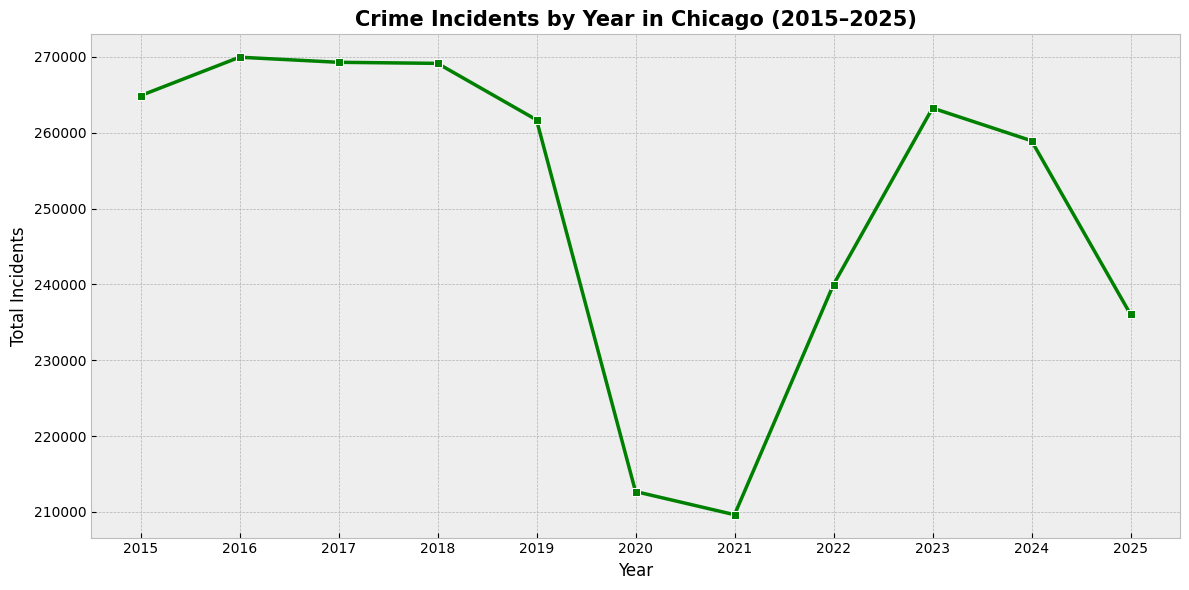

In [269]:
# 1. Long-term crime trend.
plt.figure(figsize=(12, 6))

yearly_counts = df.groupby('Year').size()

sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='s', linewidth=2.5, color='green')
plt.title("Crime Incidents by Year in Chicago (2015–2025)", fontsize=15,fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Incidents", fontsize=12)
plt.xticks(yearly_counts.index) 

plt.tight_layout()


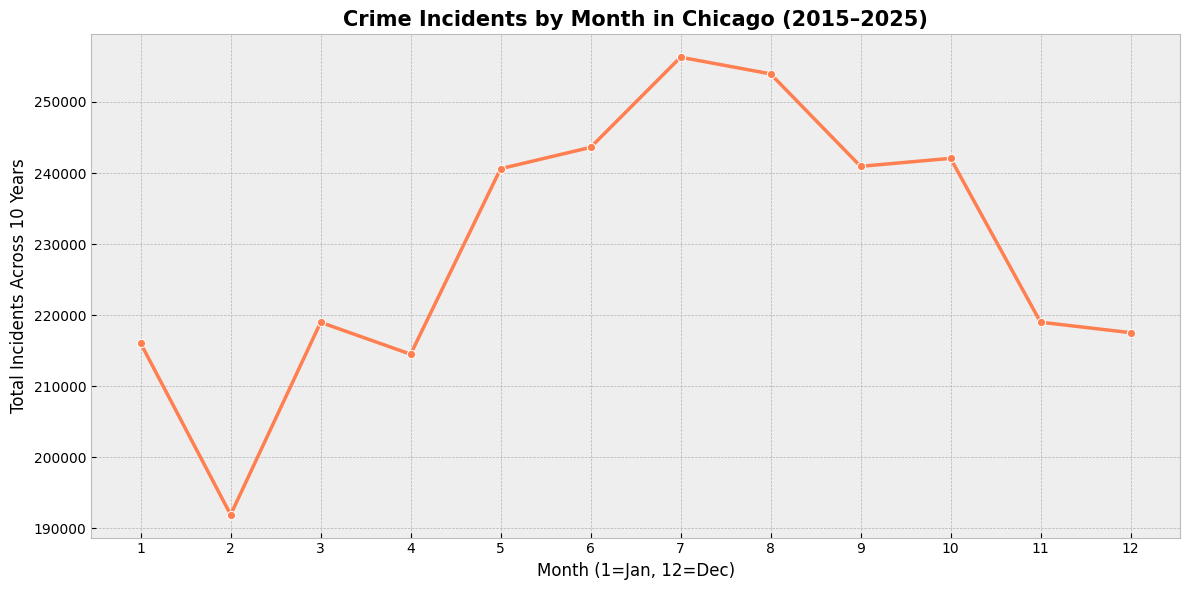

In [268]:
# 2. Seasonal crime pattern
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

monthly_counts = df.groupby('Month').size().reindex(range(1,13), fill_value=0)

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=monthly_counts.index,
    y=monthly_counts.values,
    marker='o',
    linewidth=2.5,
    color='coral'
)
plt.title("Crime Incidents by Month in Chicago (2015–2025)", fontsize=15,fontweight='bold')
plt.xlabel("Month (1=Jan, 12=Dec)", fontsize=12)
plt.ylabel("Total Incidents Across 10 Years", fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--')


plt.tight_layout()


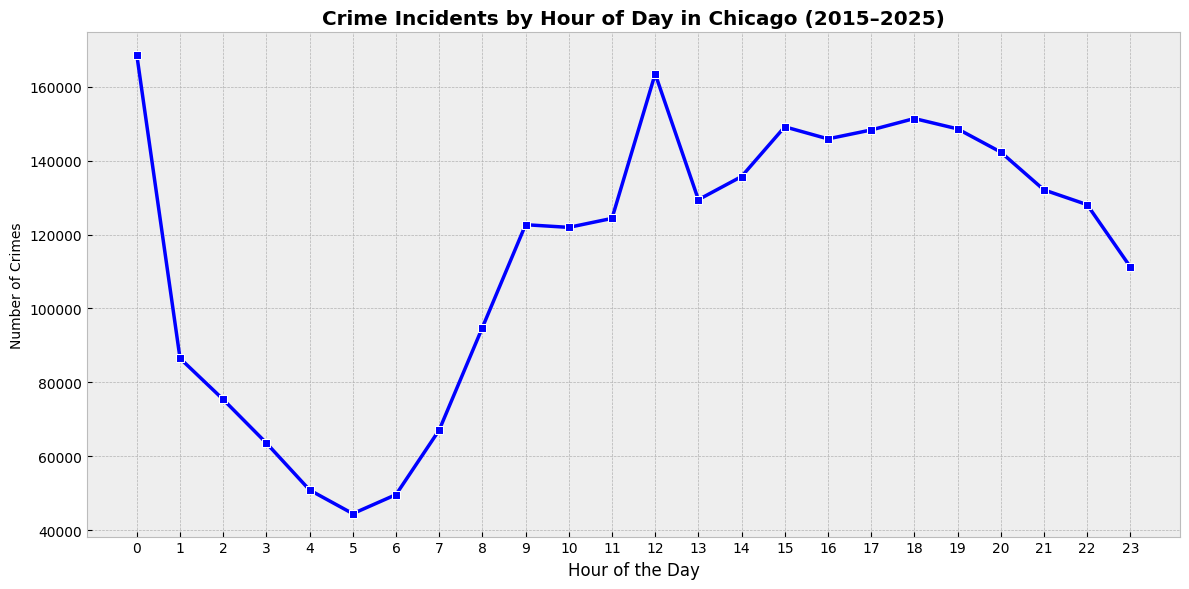

In [267]:
# 3. Daily crime pattern
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

crime_by_hour = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=crime_by_hour.index, y=crime_by_hour.values, marker='s', linewidth=2.5, color="b")
plt.xticks(ticks=range(24), labels=range(24))
plt.xlabel("Hour of the Day",fontsize=12)
plt.ylabel("Number of Crimes")
plt.title("Crime Incidents by Hour of Day in Chicago (2015–2025)",fontweight='bold')
plt.tight_layout()


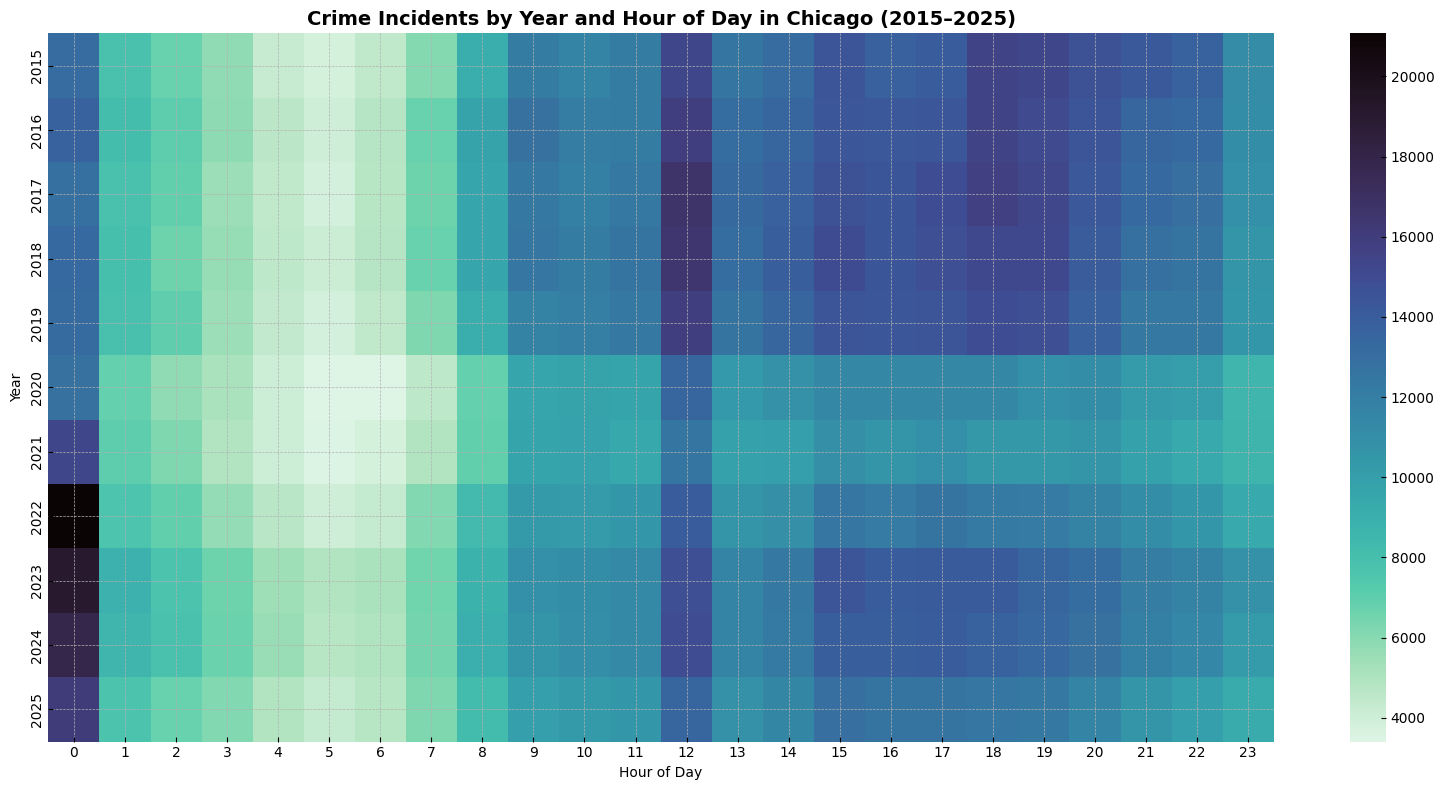

In [250]:
# 4. Hourly pattern across years.
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

pivot = df.pivot_table(
    index='Year',
    columns='Hour',
    aggfunc='size',
    fill_value=0
).reindex(columns=range(24), fill_value=0)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot, cmap='mako_r')

plt.title('Crime Incidents by Year and Hour of Day in Chicago (2015–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


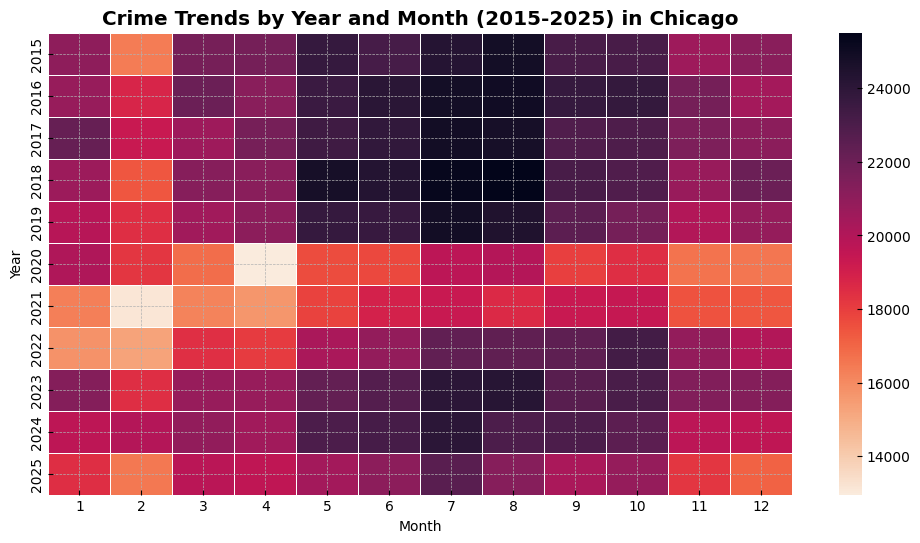

In [266]:
# 5. Monthly pattern across years
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.month

crimes_per_month = df.groupby(['Year', 'Month']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(crimes_per_month, cmap="rocket_r", linewidths=0.5, cbar=True)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Crime Trends by Year and Month (2015-2025) in Chicago",fontweight='bold')
plt.show()


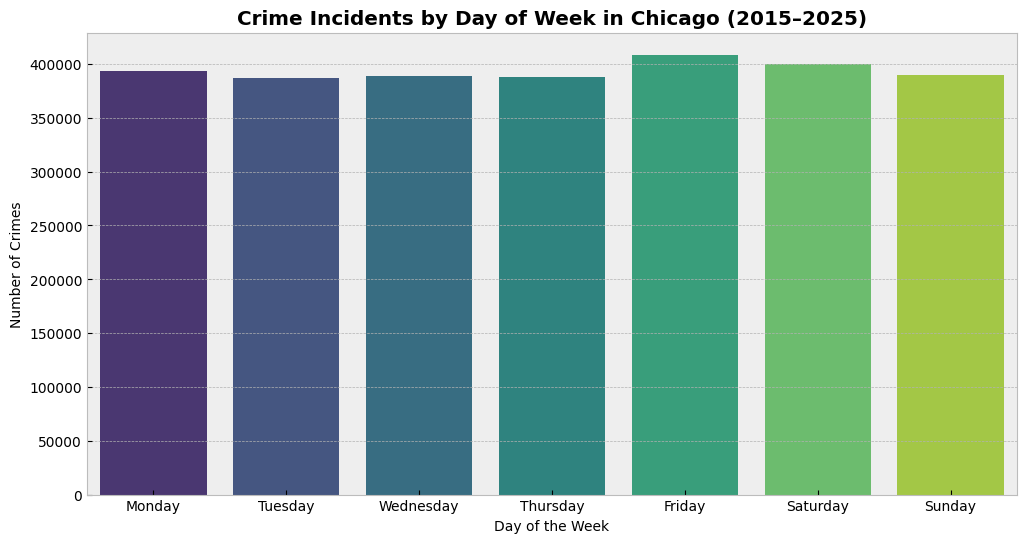

In [265]:
# 6. Weekly crime pattern
df['DayOfWeek'] = pd.to_datetime(df['Date'], errors='coerce').dt.day_name()

crime_by_day = df['DayOfWeek'].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(12, 6))
sns.barplot(x=crime_by_day.index, y=crime_by_day.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes")
plt.title("Crime Incidents by Day of Week in Chicago (2015–2025)",fontweight='bold')
plt.show()


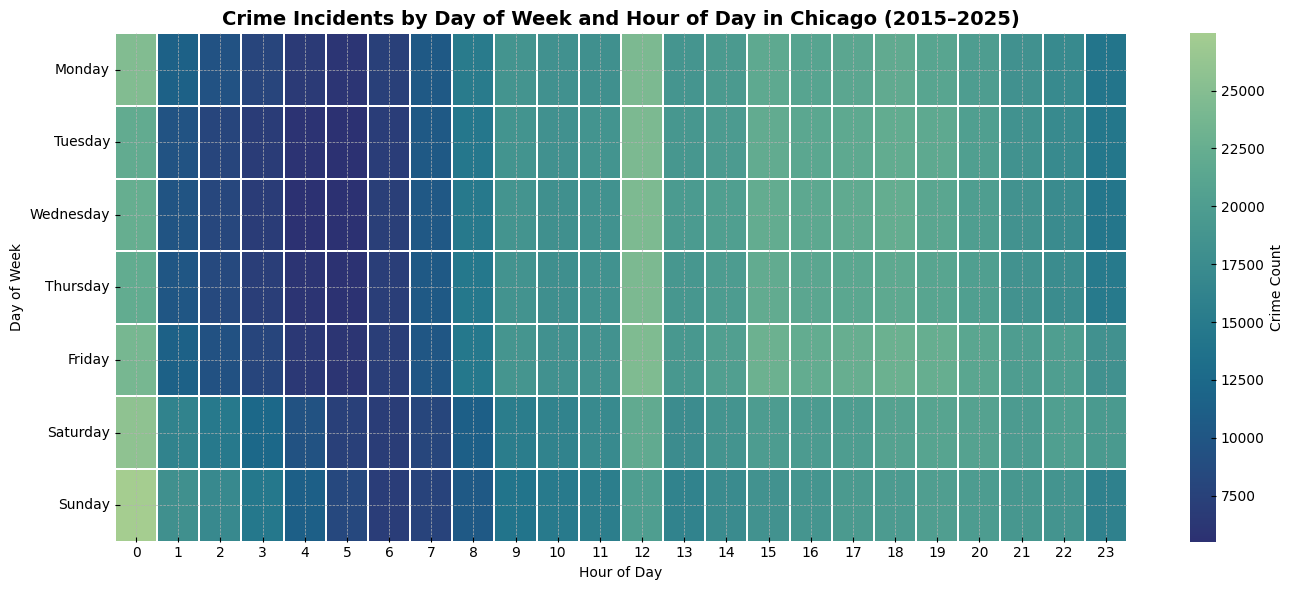

In [ ]:
# 7. Weekly-hourly crime pattern
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()


heatmap_data = (
    df.groupby(['DayOfWeek', 'Hour'])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=range(24), fill_value=0)
)

days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_data,
    cmap='crest_r',      
    linewidths=0.3,
    cbar_kws={'label': 'Crime Count'}
)

plt.title('Crime Incidents by Day of Week and Hour of Day in Chicago (2015–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()


## Spatial Distribution Study

This section analyzes where crimes are concentrated across districts, community areas, and map coordinates.
It addresses the spatial analysis requirement in the project brief.


### Objectives
- Compare crime intensity across districts and community areas
- Identify geographic hotspots and common locations
- Provide spatial evidence to support resource allocation discussions


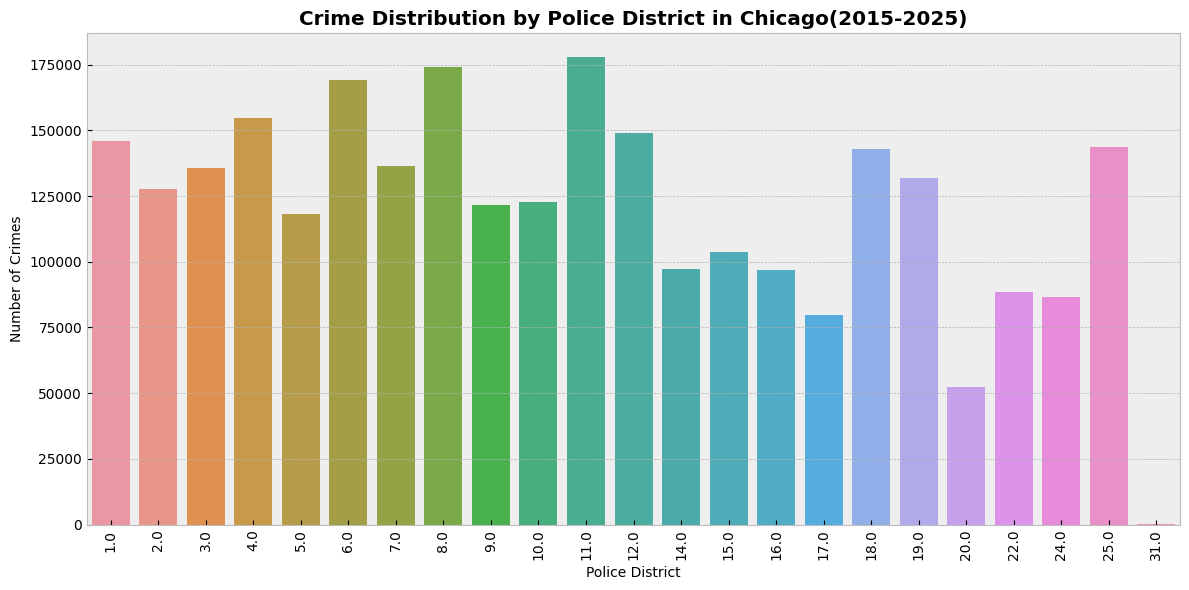

In [270]:
district_crime_counts = df['District'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=district_crime_counts.index, y=district_crime_counts.values)
plt.xlabel("Police District")
plt.ylabel("Number of Crimes")
plt.title("Crime Distribution by Police District in Chicago(2015-2025)",fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()


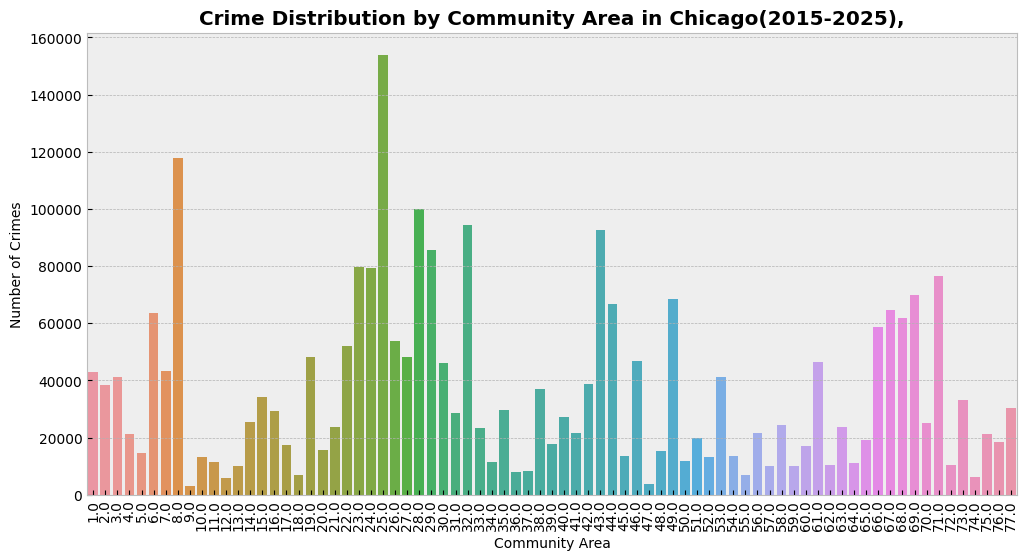

In [271]:
community_crime_counts = df['Community Area'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=community_crime_counts.index, y=community_crime_counts.values)
plt.xlabel("Community Area")
plt.ylabel("Number of Crimes")
plt.title("Crime Distribution by Community Area in Chicago(2015-2025),",fontweight='bold')
plt.xticks(rotation=90)
plt.show()


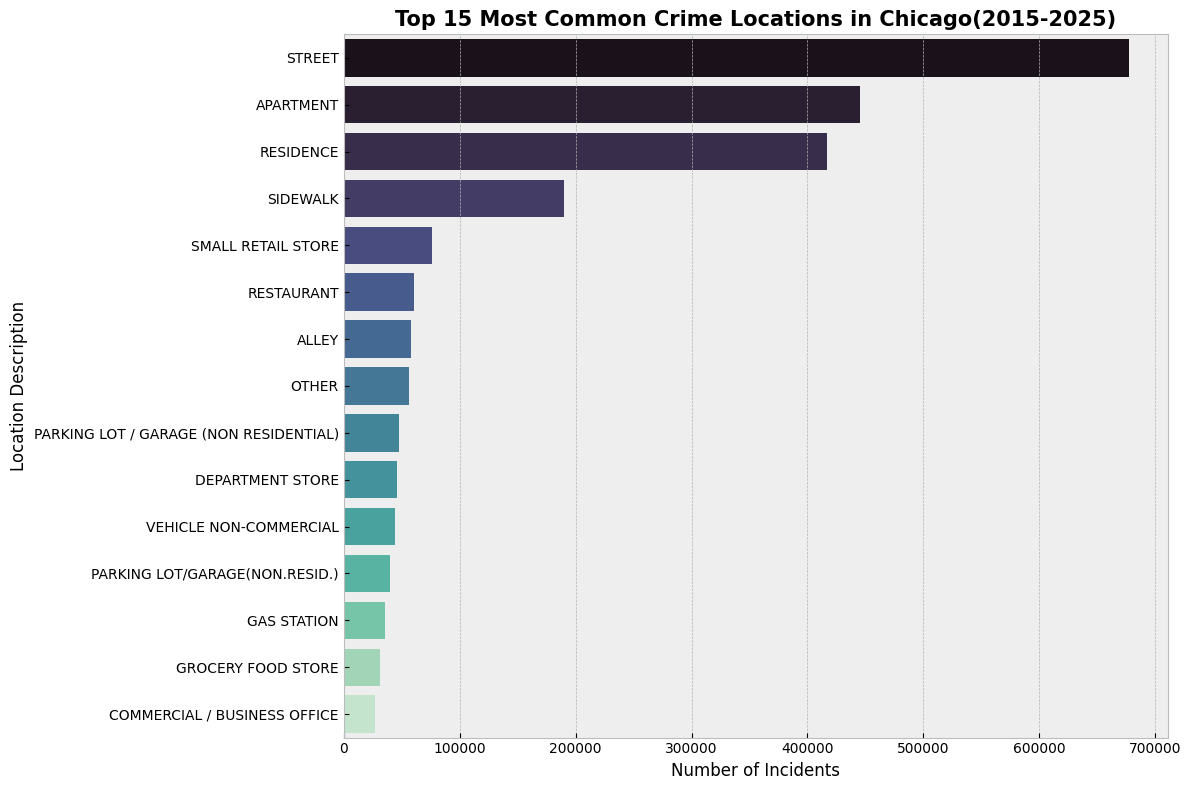

In [272]:
plt.figure(figsize=(12, 8))

top_locations = df['Location Description'].value_counts().head(15)

sns.barplot(y=top_locations.index, x=top_locations.values, palette="mako")
plt.title("Top 15 Most Common Crime Locations in Chicago(2015-2025)", fontsize=15,fontweight='bold')
plt.xlabel("Number of Incidents", fontsize=12)
plt.ylabel("Location Description", fontsize=12)

plt.tight_layout()


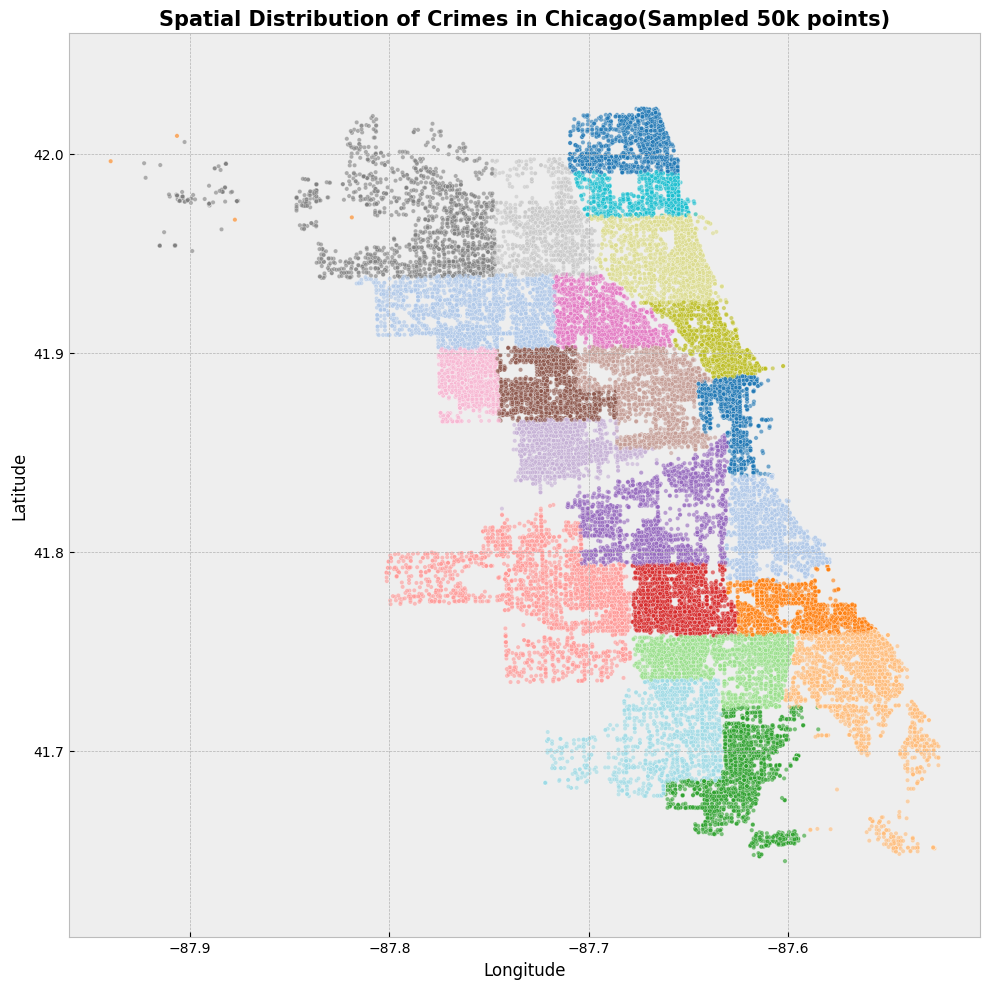

In [273]:

plt.figure(figsize=(10, 10))

sample_df = df.sample(n=50000, random_state=42)

sns.scatterplot(
    data=sample_df, 
    x='Longitude', 
    y='Latitude', 
    hue='District', 
    palette='tab20', 
    s=10, 
    legend=False,
    alpha=0.6
)

plt.title("Spatial Distribution of Crimes in Chicago(Sampled 50k points)", fontsize=15,fontweight='bold')
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

plt.axis('equal') 

plt.tight_layout()


## Crime Correlation Analysis

This section examines relationships between crime type, arrests, district patterns, and temporal behavior.
It supports actionable insights and downstream predictive modeling decisions.


### Objectives
- Explore arrest dynamics over time
- Compare crime vs arrest trends
- Examine how crime types and districts interact


In [187]:
total_arrests = df['Arrest'].sum()
print(f"Total Arrests in the Dataset: {total_arrests:,}")


Total Arrests in the Dataset: 473,192


In [188]:
arrests_per_year = df[df['Arrest'] == True].groupby('Year').size()
arrests_per_year


Year
2015    67534
2016    52872
2017    52302
2018    52961
2019    56147
2020    33849
2021    25179
2022    27391
2023    31821
2024    35635
2025    37501
dtype: int64

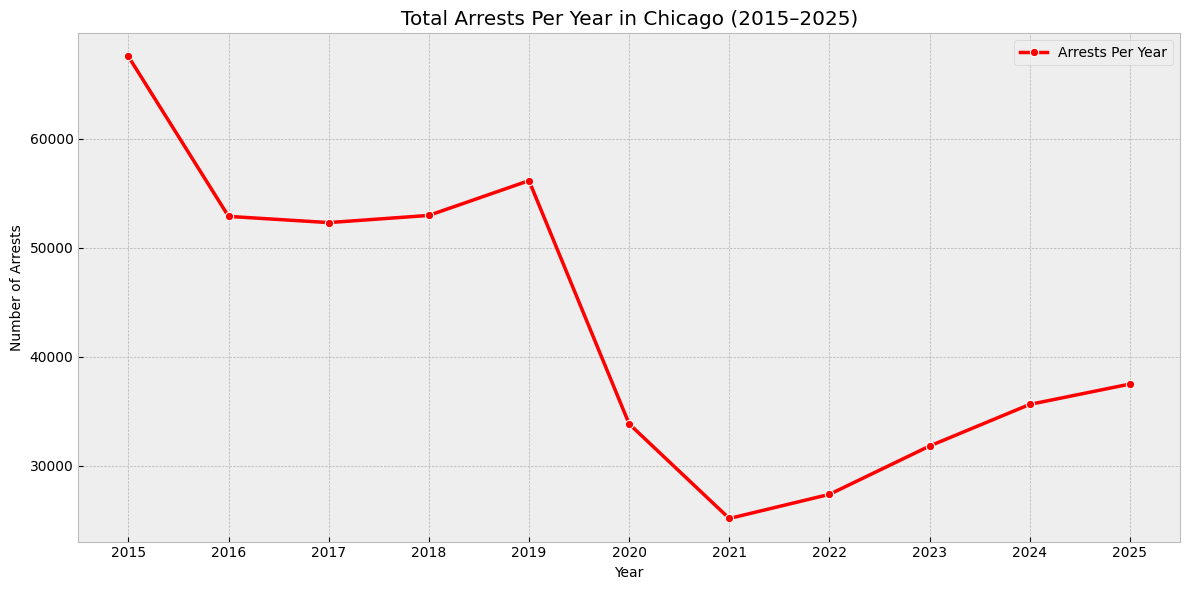

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    x=arrests_per_year.index,
    y=arrests_per_year.values,
    marker='o',
    linewidth=2.5,
    color='r',
    label="Arrests Per Year"   

plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.title("Total Arrests Per Year in Chicago (2015–2025)")

plt.xticks(arrests_per_year.index)
plt.legend()

plt.tight_layout()


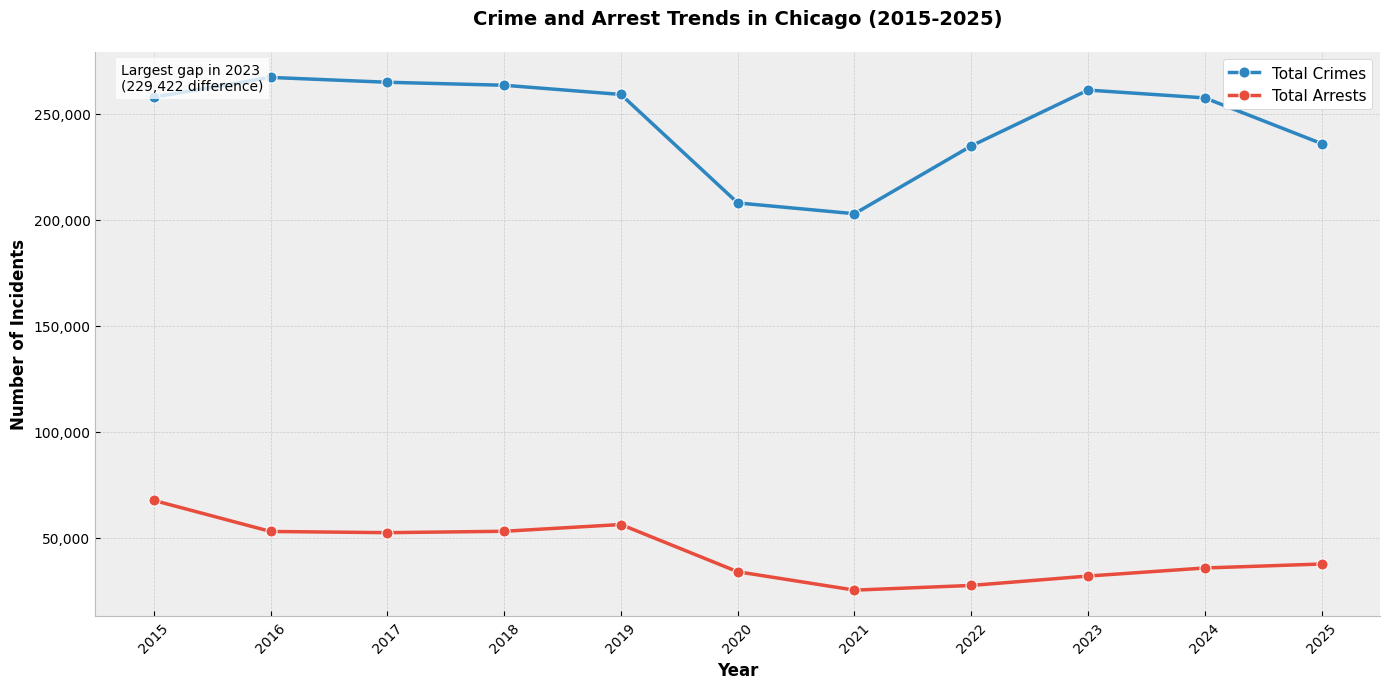

In [293]:
plt.style.use('bmh')
plt.figure(figsize=(14, 7))

sns.lineplot(
    x=crimes_per_year.index,
    y=crimes_per_year.values,
    marker='o',
    linewidth=2.5,
    markersize=8,
    color='#2E86C1',
    label="Total Crimes"
)

sns.lineplot(
    x=arrests_per_year.index,
    y=arrests_per_year.values,
    marker='o',
    linewidth=2.5,
    markersize=8,
    color='#E74C3C',
    label="Total Arrests"
)

plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Incidents", fontsize=12, fontweight='bold')
plt.title("Crime and Arrest Trends in Chicago (2015-2025)", 
          fontsize=14, 
          fontweight='bold', 
          pad=20)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x):,}"))

plt.legend(fontsize=11, 
           frameon=True, 
           facecolor='white', 
           framealpha=1, 
           loc='upper right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(crimes_per_year.index, rotation=45)

plt.tight_layout()

max_year_diff = (crimes_per_year - arrests_per_year).idxmax()
max_diff = (crimes_per_year - arrests_per_year).max()
plt.text(0.02, 0.98, 
         f'Largest gap in {max_year_diff}\n({max_diff:,.0f} difference)',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
         verticalalignment='top',
         fontsize=10)

plt.show()


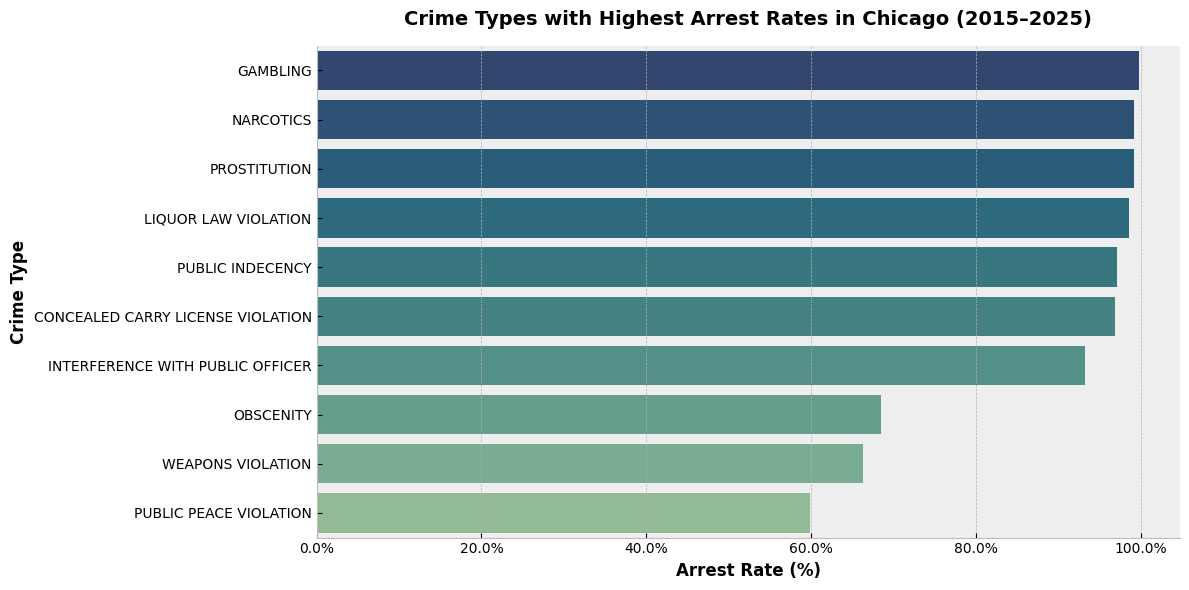

In [299]:
crime_arrest_counts = df[df['Arrest'] == True]['Primary Type'].value_counts()
crime_total_counts = df['Primary Type'].value_counts()
crime_arrest_rate = (crime_arrest_counts / crime_total_counts).sort_values(ascending=False)

top_10_most_arrested = crime_arrest_rate.head(10)
top_10_least_arrested = crime_arrest_rate.tail(10)



plt.style.use('bmh')
plt.figure(figsize=(12, 6))

sns.barplot(
    y=top_10_most_arrested.index,
    x=top_10_most_arrested.values * 100,
    palette='crest_r'
)

plt.xlabel("Arrest Rate (%)", fontsize=12, fontweight='bold')
plt.ylabel("Crime Type", fontsize=12, fontweight='bold')
plt.title("Crime Types with Highest Arrest Rates in Chicago (2015–2025)",
          fontsize=14, fontweight='bold', pad=15)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))
sns.despine()
plt.tight_layout()
plt.show()


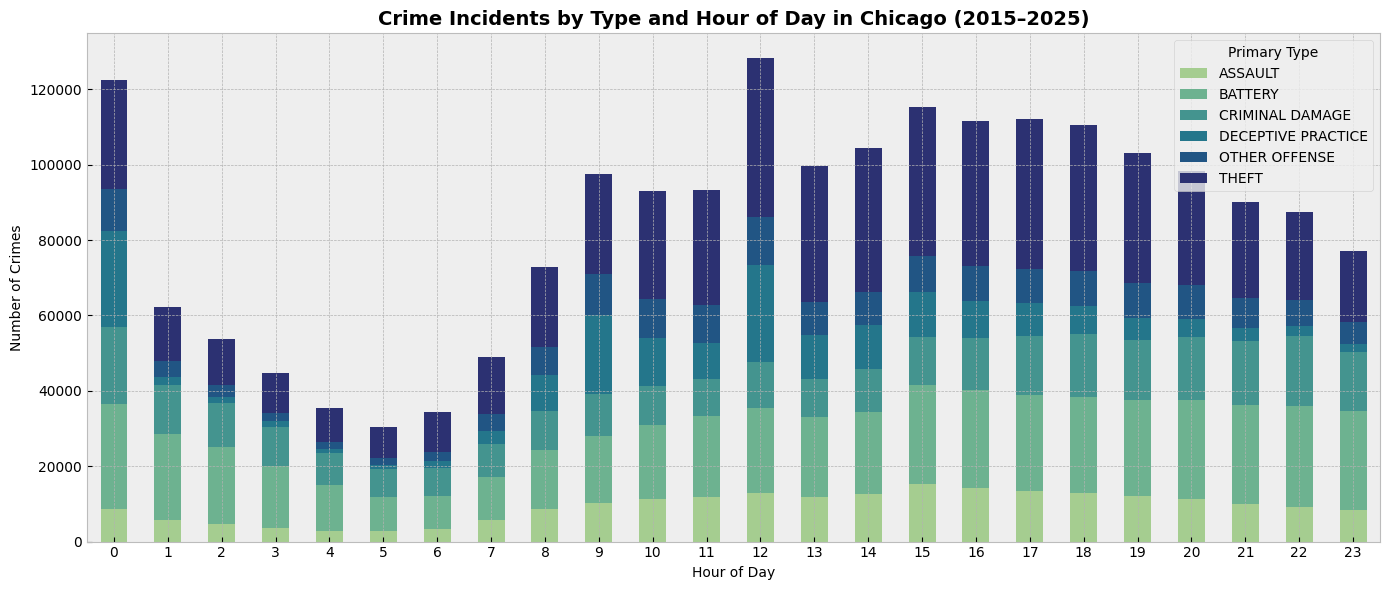

In [ ]:

top_types = df['Primary Type'].value_counts().head(6).index

temp = df[df['Primary Type'].isin(top_types)].copy()
temp['Hour'] = pd.to_datetime(temp['Time'], format='%H:%M:%S', errors='coerce').dt.hour

type_hour = pd.crosstab(temp['Hour'], temp['Primary Type'])

type_hour.plot(
    kind='bar',
    stacked=True,
    figsize=(14,6),
    colormap='crest'
)

plt.title('Crime Incidents by Type and Hour of Day in Chicago (2015–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


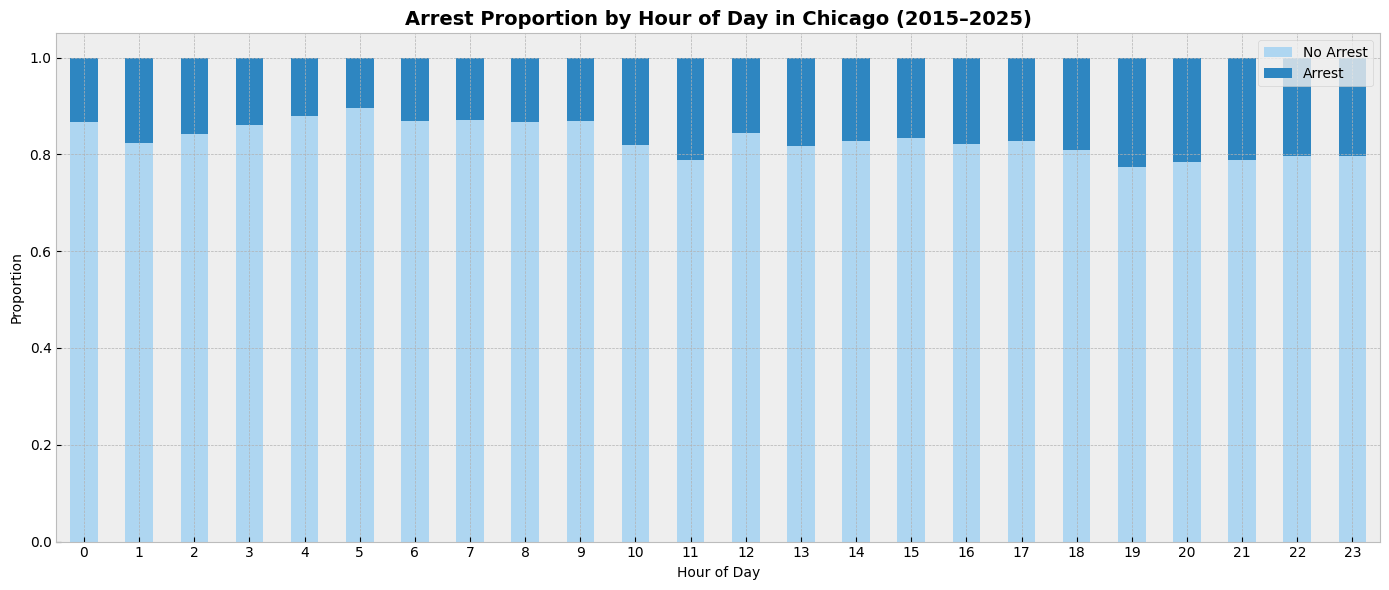

In [275]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

arrest_hour = pd.crosstab(df['Hour'], df['Arrest'], normalize='index')

arrest_hour.plot(
    kind='bar',
    stacked=True,
    figsize=(14,6),
    color=['#AED6F1', '#2E86C1']
)

plt.title('Arrest Proportion by Hour of Day in Chicago (2015–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(['No Arrest', 'Arrest'])
plt.tight_layout()
plt.show()


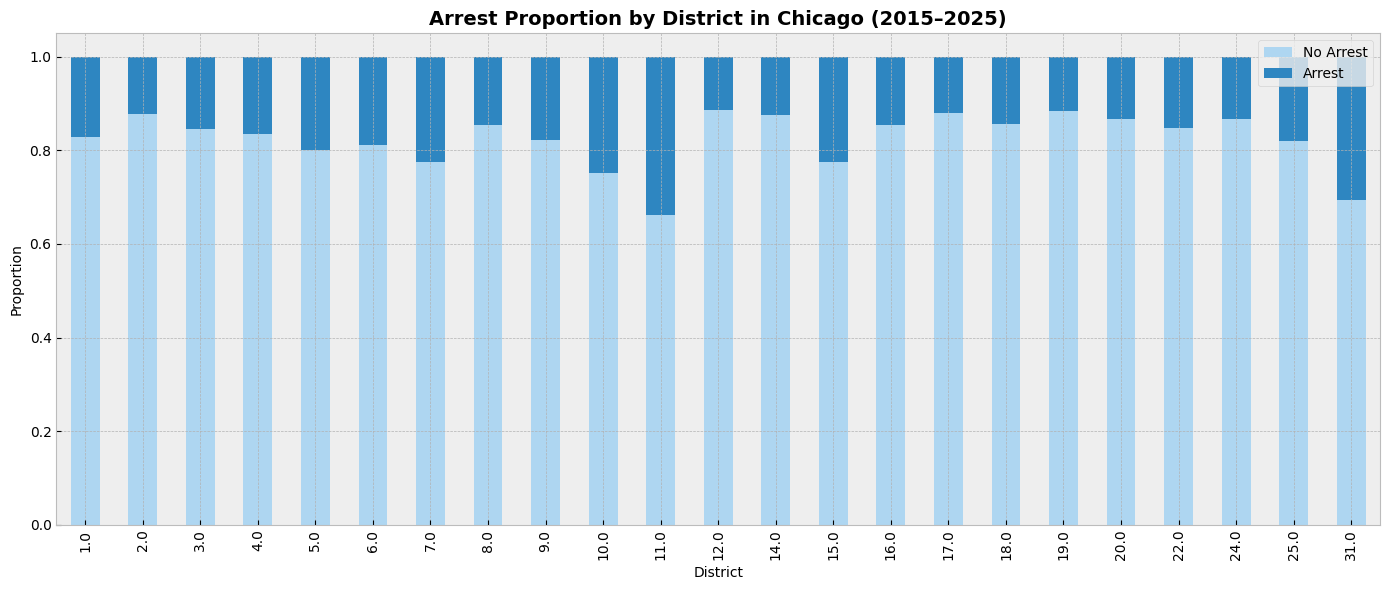

In [276]:
arrest_district = pd.crosstab(df['District'], df['Arrest'], normalize='index')

arrest_district.plot(
    kind='bar',
    stacked=True,
    figsize=(14,6),
    color=['#AED6F1', '#2E86C1']
)

plt.title('Arrest Proportion by District in Chicago (2015–2025)', fontsize=14, fontweight='bold')
plt.xlabel('District')
plt.ylabel('Proportion')
plt.legend(['No Arrest', 'Arrest'])
plt.tight_layout()
plt.show()


Text(150.58333333333334, 0.5, 'Crime Type')

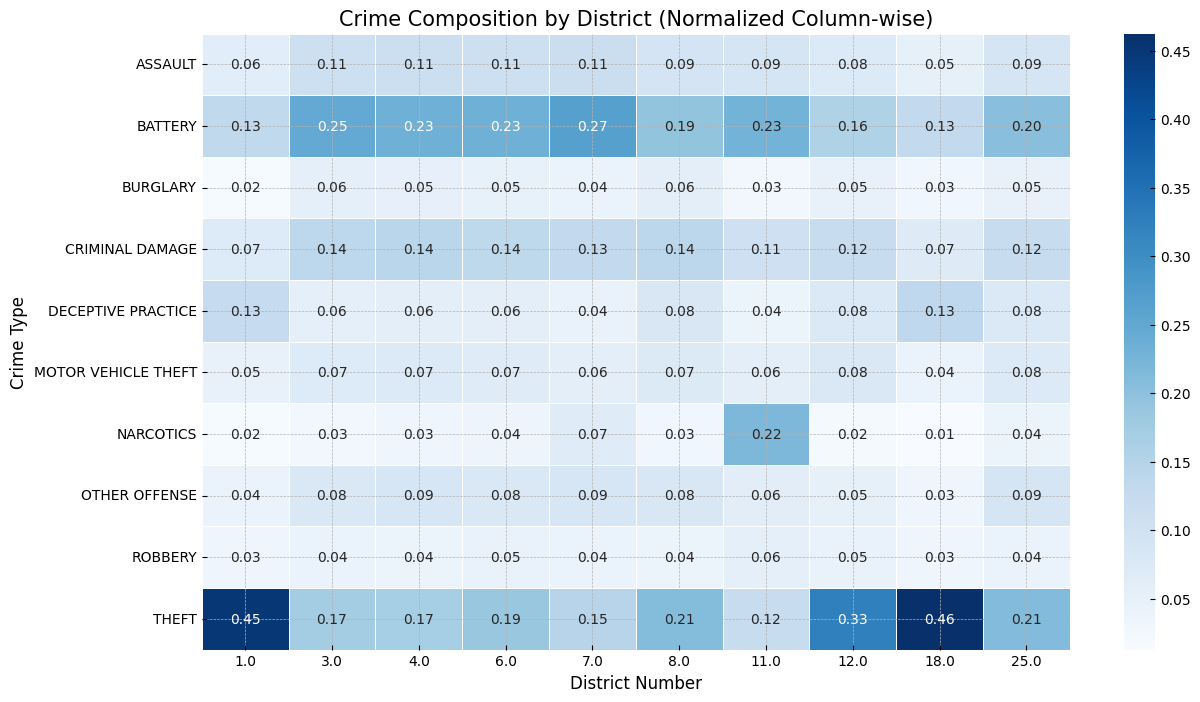

In [304]:
# Crime Type vs District correlation
plt.figure(figsize=(14, 8))
#Select the top 10 crime types and the top 10 busiest areas to see what the relationship is between them.
top_10_crimes = df['Primary Type'].value_counts().head(10).index
top_10_districts = df['District'].value_counts().head(10).index

matrix_df = df[
    (df['Primary Type'].isin(top_10_crimes)) & 
    (df['District'].isin(top_10_districts))
]

crime_district_matrix = pd.crosstab(matrix_df['Primary Type'], matrix_df['District'])

crime_district_matrix_norm = crime_district_matrix.div(crime_district_matrix.sum(axis=0), axis=1)

sns.heatmap(crime_district_matrix_norm, cmap="Blues", linewidths=0.5, annot=True, fmt=".2f")
plt.title("Crime Composition by District (Normalized Column-wise)", fontsize=15)
plt.xlabel("District Number", fontsize=12)
plt.ylabel("Crime Type", fontsize=12)
